# In this notebook, I use only ages from 0 to 60

# Pre-processing the whole dataset (UTKFACE +FG-NET + APPA_REAL)

In [ ]:
!pip install gdown


# Dowload Dataset from drive link

In [ ]:
import gdown
import zipfile
import os

# ---- GOOGLE DRIVE ZIP FILE ID ----
file_id = "19DDFTo3GdBDRV73meu_ots0grhJ4GYHh"
download_url = f"https://drive.google.com/uc?id={file_id}"

# ---- OUTPUT ZIP NAME ----
output_zip = "dataset.zip"

print("Downloading file...")
gdown.download(download_url, output_zip, quiet=False)

print("Download complete!")

# ---- EXTRACT ZIP ----
extract_path = "extracted_dataset"

print("Extracting...")
with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extraction done! Files saved to: {extract_path}")


Downloading...
From (original): https://drive.google.com/uc?id=19DDFTo3GdBDRV73meu_ots0grhJ4GYHh
From (redirected): https://drive.google.com/uc?id=19DDFTo3GdBDRV73meu_ots0grhJ4GYHh&confirm=t&uuid=db5dfbbc-29f0-4f93-9980-d952f606e61e
To: /content/dataset.zip
100%|██████████| 402M/402M [00:06<00:00, 59.9MB/s]


Download complete!
Extracting...
Extraction done! Files saved to: extracted_dataset


# Count the undersampled dataset

In [ ]:
import os
import glob
from collections import defaultdict

# --- Configuration ---
# Set the path to your main dataset folder
DATASET_PATH = '/content/extracted_dataset'
# Adjust this if the script is run from a different location

# --- Main Logic ---

# 1. Count Total JPG Files
# Use glob to find all files ending in .jpg (case-insensitive) recursively
all_jpg_files = glob.glob(
    os.path.join(DATASET_PATH, '**', '*.[jJ][pP][gG]'),
    recursive=True
)
total_jpg_count = len(all_jpg_files)

# 2. Count Samples Per Folder (Age Group)
samples_per_age = defaultdict(int)

# List all items (folders) inside the main dataset path
try:
    for item in os.listdir(DATASET_PATH):
        folder_path = os.path.join(DATASET_PATH, item)

        # Check if the item is a directory
        if os.path.isdir(folder_path):
            # Count the number of JPG files inside this specific age folder
            age_samples = glob.glob(
                os.path.join(folder_path, '*.[jJ][pP][gG]')
            )

            # Use the folder name (e.g., '1', '10') as the key
            samples_per_age[item] = len(age_samples)

except FileNotFoundError:
    print(f"Error: The directory '{DATASET_PATH}' was not found.")
    total_jpg_count = 0


# --- Results Output ---
print("--- Dataset File Counts ---")
print(f"**Total number of JPG files in '{DATASET_PATH}' (and subdirectories):** {total_jpg_count}\n")
print("**Number of samples (JPG files) per Age Folder:**")

# -------------------------------------------------------------
# FIXED LINE: Ensure the key always returns a comparable type (a tuple)
# -------------------------------------------------------------
sorted_ages = sorted(
    samples_per_age.keys(),
    # Key returns (0, integer_value) for age folders, and (1, string_value) for non-age folders.
    key=lambda x: (0, int(x)) if x.isdigit() else (1, x)
)

for age in sorted_ages:
    print(f"  Folder '{age}': {samples_per_age[age]} samples")

--- Dataset File Counts ---
**Total number of JPG files in '/content/extracted_dataset' (and subdirectories):** 32173

**Number of samples (JPG files) per Age Folder:**
  Folder '0': 43 samples
  Folder '1': 1299 samples
  Folder '2': 603 samples
  Folder '3': 352 samples
  Folder '4': 416 samples
  Folder '5': 323 samples
  Folder '6': 236 samples
  Folder '7': 243 samples
  Folder '8': 338 samples
  Folder '9': 225 samples
  Folder '10': 239 samples
  Folder '11': 149 samples
  Folder '12': 223 samples
  Folder '13': 192 samples
  Folder '14': 314 samples
  Folder '15': 335 samples
  Folder '16': 475 samples
  Folder '17': 349 samples
  Folder '18': 502 samples
  Folder '19': 301 samples
  Folder '20': 482 samples
  Folder '21': 505 samples
  Folder '22': 589 samples
  Folder '23': 659 samples
  Folder '24': 1079 samples
  Folder '25': 1066 samples
  Folder '26': 2434 samples
  Folder '27': 855 samples
  Folder '28': 1147 samples
  Folder '29': 743 samples
  Folder '30': 1060 samples

#Plot Dataset Distribuition

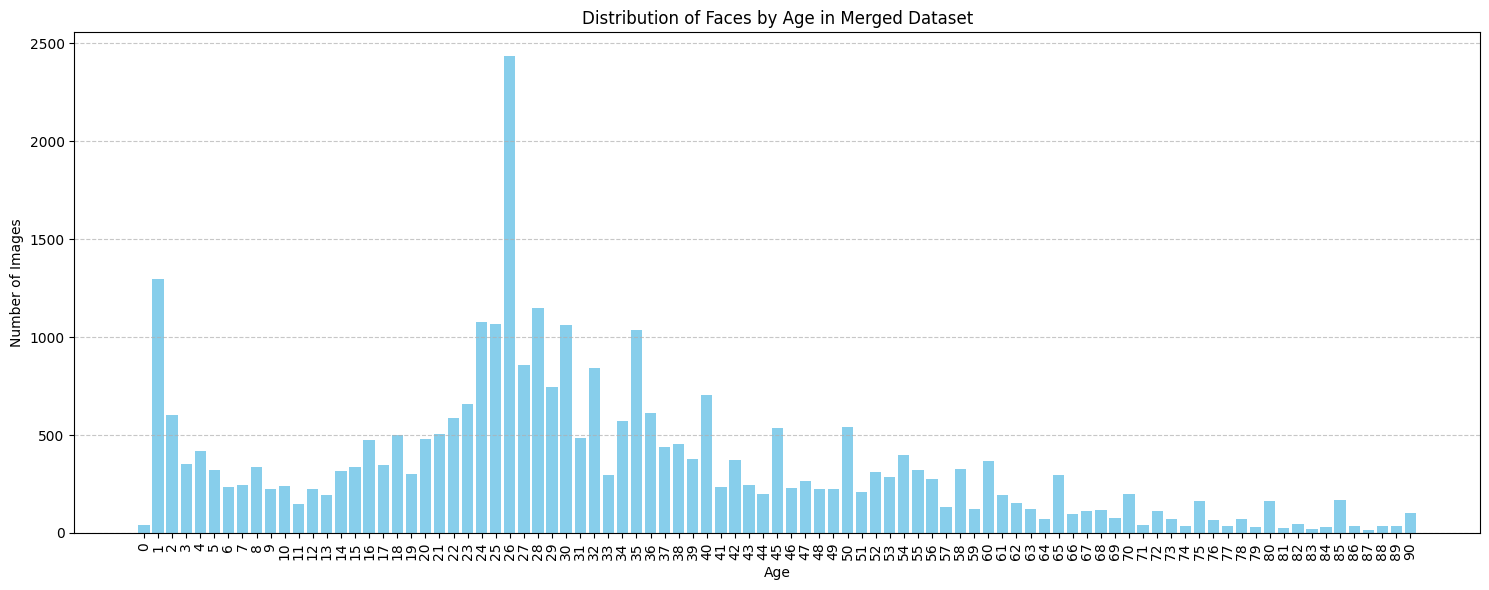

In [ ]:
import os
import matplotlib.pyplot as plt

faces_folder = "/content/extracted_dataset"

# Collect counts per age folder
age_counts = {}
for age in os.listdir(faces_folder):
    age_path = os.path.join(faces_folder, age)
    if os.path.isdir(age_path) and age.isdigit():
        num_images = len([f for f in os.listdir(age_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        age_counts[int(age)] = num_images

# Sort by age
ages_sorted = sorted(age_counts.keys())
counts_sorted = [age_counts[age] for age in ages_sorted]

# Plot
plt.figure(figsize=(15,6))
plt.bar(ages_sorted, counts_sorted, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Number of Images")
plt.title("Distribution of Faces by Age in Merged Dataset")
plt.xticks(ages_sorted, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Undersample to 1000 samples max per age

In [ ]:
import os
import random
import shutil

# Paths
input_folder = '/content/extracted_dataset'
output_folder = '/content/new_dataset'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate over age subfolders
for age_folder in os.listdir(input_folder):
    age_path = os.path.join(input_folder, age_folder)
    if not os.path.isdir(age_path):
        continue

    # List all image files
    all_images = [f for f in os.listdir(age_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Downsample if more than 1000
    if len(all_images) > 1000:
        selected_images = random.sample(all_images, 1000)
    else:
        selected_images = all_images

    # Create corresponding folder in output
    output_age_path = os.path.join(output_folder, age_folder)
    os.makedirs(output_age_path, exist_ok=True)

    # Copy images
    for img in selected_images:
        src_path = os.path.join(age_path, img)
        dst_path = os.path.join(output_age_path, img)
        shutil.copy2(src_path, dst_path)

    print(f"Folder '{age_folder}': {len(selected_images)} samples copied.")

print("Downsampling completed. New dataset saved in 'new_dataset' folder.")


Folder '77': 36 samples copied.
Folder '64': 73 samples copied.
Folder '58': 326 samples copied.
Folder '28': 1000 samples copied.
Folder '65': 295 samples copied.
Folder '59': 123 samples copied.
Folder '4': 416 samples copied.
Folder '39': 379 samples copied.
Folder '.ipynb_checkpoints': 0 samples copied.
Folder '18': 502 samples copied.
Folder '79': 29 samples copied.
Folder '23': 659 samples copied.
Folder '49': 225 samples copied.
Folder '68': 115 samples copied.
Folder '12': 223 samples copied.
Folder '35': 1000 samples copied.
Folder '48': 222 samples copied.
Folder '27': 855 samples copied.
Folder '72': 111 samples copied.
Folder '41': 236 samples copied.
Folder '83': 21 samples copied.
Folder '56': 277 samples copied.
Folder '9': 225 samples copied.
Folder '88': 37 samples copied.
Folder '38': 454 samples copied.
Folder '46': 230 samples copied.
Folder '55': 321 samples copied.
Folder '1': 1000 samples copied.
Folder '85': 167 samples copied.
Folder '61': 192 samples copied.
F

# Count new dataset

In [ ]:
import os
import glob
from collections import defaultdict

# --- Configuration ---
# Set the path to your main dataset folder
DATASET_PATH = '/content/new_dataset'
# Adjust this if the script is run from a different location

# --- Main Logic ---

# 1. Count Total JPG Files
# Use glob to find all files ending in .jpg (case-insensitive) recursively
all_jpg_files = glob.glob(
    os.path.join(DATASET_PATH, '**', '*.[jJ][pP][gG]'),
    recursive=True
)
total_jpg_count = len(all_jpg_files)

# 2. Count Samples Per Folder (Age Group)
samples_per_age = defaultdict(int)

# List all items (folders) inside the main dataset path
try:
    for item in os.listdir(DATASET_PATH):
        folder_path = os.path.join(DATASET_PATH, item)

        # Check if the item is a directory
        if os.path.isdir(folder_path):
            # Count the number of JPG files inside this specific age folder
            age_samples = glob.glob(
                os.path.join(folder_path, '*.[jJ][pP][gG]')
            )

            # Use the folder name (e.g., '1', '10') as the key
            samples_per_age[item] = len(age_samples)

except FileNotFoundError:
    print(f"Error: The directory '{DATASET_PATH}' was not found.")
    total_jpg_count = 0


# --- Results Output ---
print("--- Dataset File Counts ---")
print(f"**Total number of JPG files in '{DATASET_PATH}' (and subdirectories):** {total_jpg_count}\n")
print("**Number of samples (JPG files) per Age Folder:**")

# -------------------------------------------------------------
# FIXED LINE: Ensure the key always returns a comparable type (a tuple)
# -------------------------------------------------------------
sorted_ages = sorted(
    samples_per_age.keys(),
    # Key returns (0, integer_value) for age folders, and (1, string_value) for non-age folders.
    key=lambda x: (0, int(x)) if x.isdigit() else (1, x)
)

for age in sorted_ages:
    print(f"  Folder '{age}': {samples_per_age[age]} samples")

--- Dataset File Counts ---
**Total number of JPG files in '/content/new_dataset' (and subdirectories):** 30050

**Number of samples (JPG files) per Age Folder:**
  Folder '0': 43 samples
  Folder '1': 1000 samples
  Folder '2': 603 samples
  Folder '3': 352 samples
  Folder '4': 416 samples
  Folder '5': 323 samples
  Folder '6': 236 samples
  Folder '7': 243 samples
  Folder '8': 338 samples
  Folder '9': 225 samples
  Folder '10': 239 samples
  Folder '11': 149 samples
  Folder '12': 223 samples
  Folder '13': 192 samples
  Folder '14': 314 samples
  Folder '15': 335 samples
  Folder '16': 475 samples
  Folder '17': 349 samples
  Folder '18': 502 samples
  Folder '19': 301 samples
  Folder '20': 482 samples
  Folder '21': 505 samples
  Folder '22': 589 samples
  Folder '23': 659 samples
  Folder '24': 1000 samples
  Folder '25': 1000 samples
  Folder '26': 1000 samples
  Folder '27': 855 samples
  Folder '28': 1000 samples
  Folder '29': 743 samples
  Folder '30': 1000 samples
  Fol

# Plot Visualization of undersampled Datasett

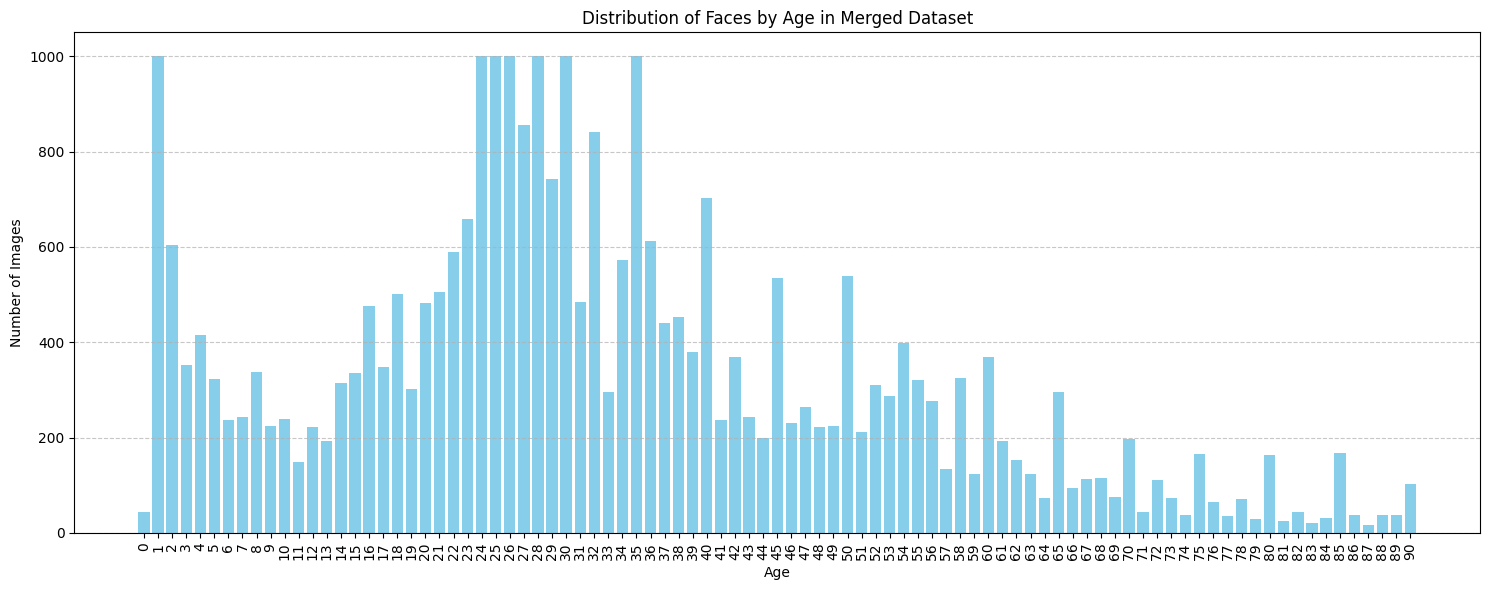

In [ ]:
import os
import matplotlib.pyplot as plt

faces_folder = "/content/new_dataset"

# Collect counts per age folder
age_counts = {}
for age in os.listdir(faces_folder):
    age_path = os.path.join(faces_folder, age)
    if os.path.isdir(age_path) and age.isdigit():
        num_images = len([f for f in os.listdir(age_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        age_counts[int(age)] = num_images

# Sort by age
ages_sorted = sorted(age_counts.keys())
counts_sorted = [age_counts[age] for age in ages_sorted]

# Plot
plt.figure(figsize=(15,6))
plt.bar(ages_sorted, counts_sorted, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Number of Images")
plt.title("Distribution of Faces by Age in Merged Dataset")
plt.xticks(ages_sorted, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Model only works on ages from 0 to 60

In [ ]:
import os
import shutil

root_path = "/content/new_dataset"   # your dataset root

for folder in os.listdir(root_path):
    folder_path = os.path.join(root_path, folder)

    # Skip non-folders
    if not os.path.isdir(folder_path):
        continue

    # Convert folder name to integer age
    try:
        age = int(folder)
    except ValueError:
        print(f"Skipping non-numeric folder: {folder}")
        continue

    # Delete if age > 60
    if age > 60:
        print(f"Deleting folder: {folder_path}")
        shutil.rmtree(folder_path)

print("Done!")


Deleting folder: /content/new_dataset/77
Deleting folder: /content/new_dataset/64
Deleting folder: /content/new_dataset/65
Skipping non-numeric folder: .ipynb_checkpoints
Deleting folder: /content/new_dataset/79
Deleting folder: /content/new_dataset/68
Deleting folder: /content/new_dataset/72
Deleting folder: /content/new_dataset/83
Deleting folder: /content/new_dataset/88
Deleting folder: /content/new_dataset/85
Deleting folder: /content/new_dataset/61
Deleting folder: /content/new_dataset/86
Deleting folder: /content/new_dataset/63
Deleting folder: /content/new_dataset/66
Deleting folder: /content/new_dataset/87
Deleting folder: /content/new_dataset/73
Deleting folder: /content/new_dataset/76
Deleting folder: /content/new_dataset/67
Deleting folder: /content/new_dataset/81
Deleting folder: /content/new_dataset/71
Deleting folder: /content/new_dataset/84
Deleting folder: /content/new_dataset/70
Deleting folder: /content/new_dataset/69
Deleting folder: /content/new_dataset/62
Deleting 

# Counting samples per age folder after deletion

In [ ]:
import os
import glob
from collections import defaultdict

# --- Configuration ---
# Set the path to your main dataset folder
DATASET_PATH = '/content/new_dataset'
# Adjust this if the script is run from a different location

# --- Main Logic ---

# 1. Count Total JPG Files
# Use glob to find all files ending in .jpg (case-insensitive) recursively
all_jpg_files = glob.glob(
    os.path.join(DATASET_PATH, '**', '*.[jJ][pP][gG]'),
    recursive=True
)
total_jpg_count = len(all_jpg_files)

# 2. Count Samples Per Folder (Age Group)
samples_per_age = defaultdict(int)

# List all items (folders) inside the main dataset path
try:
    for item in os.listdir(DATASET_PATH):
        folder_path = os.path.join(DATASET_PATH, item)

        # Check if the item is a directory
        if os.path.isdir(folder_path):
            # Count the number of JPG files inside this specific age folder
            age_samples = glob.glob(
                os.path.join(folder_path, '*.[jJ][pP][gG]')
            )

            # Use the folder name (e.g., '1', '10') as the key
            samples_per_age[item] = len(age_samples)

except FileNotFoundError:
    print(f"Error: The directory '{DATASET_PATH}' was not found.")
    total_jpg_count = 0


# --- Results Output ---
print("--- Dataset File Counts ---")
print(f"**Total number of JPG files in '{DATASET_PATH}' (and subdirectories):** {total_jpg_count}\n")
print("**Number of samples (JPG files) per Age Folder:**")

# -------------------------------------------------------------
# FIXED LINE: Ensure the key always returns a comparable type (a tuple)
# -------------------------------------------------------------
sorted_ages = sorted(
    samples_per_age.keys(),
    # Key returns (0, integer_value) for age folders, and (1, string_value) for non-age folders.
    key=lambda x: (0, int(x)) if x.isdigit() else (1, x)
)

for age in sorted_ages:
    print(f"  Folder '{age}': {samples_per_age[age]} samples")

--- Dataset File Counts ---
**Total number of JPG files in '/content/new_dataset' (and subdirectories):** 27300

**Number of samples (JPG files) per Age Folder:**
  Folder '0': 43 samples
  Folder '1': 1000 samples
  Folder '2': 603 samples
  Folder '3': 352 samples
  Folder '4': 416 samples
  Folder '5': 323 samples
  Folder '6': 236 samples
  Folder '7': 243 samples
  Folder '8': 338 samples
  Folder '9': 225 samples
  Folder '10': 239 samples
  Folder '11': 149 samples
  Folder '12': 223 samples
  Folder '13': 192 samples
  Folder '14': 314 samples
  Folder '15': 335 samples
  Folder '16': 475 samples
  Folder '17': 349 samples
  Folder '18': 502 samples
  Folder '19': 301 samples
  Folder '20': 482 samples
  Folder '21': 505 samples
  Folder '22': 589 samples
  Folder '23': 659 samples
  Folder '24': 1000 samples
  Folder '25': 1000 samples
  Folder '26': 1000 samples
  Folder '27': 855 samples
  Folder '28': 1000 samples
  Folder '29': 743 samples
  Folder '30': 1000 samples
  Fol

# Stratified Sampling

In [ ]:
import numpy as np
import os
from glob import glob
from sklearn.model_selection import train_test_split
# ... (Steps 1 & 2 remain the same) ...
# -------------------------------
# 1. Path to your dataset
# -------------------------------
data_dir = "/content/new_dataset"

# -------------------------------
# 2. Collect all image paths + labels
# -------------------------------
file_paths = glob(os.path.join(data_dir, "*/*.jpg")) \
           + glob(os.path.join(data_dir, "*/*.jpeg")) \
           + glob(os.path.join(data_dir, "*/*.png"))

labels = [int(os.path.basename(os.path.dirname(p))) for p in file_paths]

print("Total images found:", len(file_paths))

# -------------------------------
# 3. Create discrete bins for stratification
# -------------------------------
# Define the age ranges (bins). E.g., every 5 or 10 years.
# Use pd.cut or np.digitize for robust binning.

# Example: Bins for 0-10, 10-20, 20-30, ..., 80-90.
bins = np.digitize(labels, bins=np.arange(10, max(labels) + 10, 10))

# -------------------------------
# 4. Stratified Train/Test split using the BINS
# -------------------------------
train_paths, temp_paths, train_bins, temp_bins = train_test_split(
    file_paths,
    bins, # Use the BINS, not the continuous labels
    test_size=0.30,
    stratify=bins,
    random_state=42
)
# Note: Since the bins are used only for stratification,
# we need to make sure the continuous labels are passed to the next step,
# but your original code only passes the paths and the temp_labels/temp_bins.

# A more robust way to track continuous labels:
# (Assuming your original 'labels' array has the correct order)
train_indices, temp_indices = train_test_split(
    np.arange(len(file_paths)),
    stratify=bins,
    test_size=0.30,
    random_state=42
)
train_paths = [file_paths[i] for i in train_indices]
temp_paths = [file_paths[i] for i in temp_indices]
train_labels = [labels[i] for i in train_indices]
temp_labels = [labels[i] for i in temp_indices]
temp_bins = [bins[i] for i in temp_indices] # We still need the bins for the next split

# -------------------------------
# 5. Stratified Val/Test split using the BINS
# -------------------------------
val_indices, test_indices = train_test_split(
    np.arange(len(temp_paths)),
    stratify=temp_bins, # Stratify the temp set based on the bins of the temp set
    test_size=0.50,
    random_state=42
)
val_paths = [temp_paths[i] for i in val_indices]
test_paths = [temp_paths[i] for i in test_indices]
val_labels = [temp_labels[i] for i in val_indices]
test_labels = [temp_labels[i] for i in test_indices]

Total images found: 26349


# Pre-processing Pipeline

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input


# -----------------------------
# 1. Config
# -----------------------------
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# -----------------------------
# 2. Data Augmentation Layer
# -----------------------------
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05),
    tf.keras.layers.RandomBrightness(factor=0.1),
    tf.keras.layers.RandomContrast(factor=0.1),
], name="augmentation")


# -----------------------------
# 3. Preprocessing Functions
# -----------------------------
def process_path(file_path):
    # Extract label (folder name = age)
    label = tf.strings.split(file_path, os.sep)[-2]
    label = tf.strings.to_number(label, tf.float32)

    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))

    return img, label


def augment_and_preprocess(img, label):
    img = data_augmentation(img)
    img = preprocess_input(img)
    return img, label


def only_preprocess(img, label):
    return preprocess_input(img), label


# -----------------------------
# 4. Build tf.data pipelines
# -----------------------------
def build_dataset(paths, training=False):
    ds = tf.data.Dataset.from_tensor_slices(paths)
    ds = ds.map(process_path, num_parallel_calls=AUTOTUNE)

    if training:
        ds = ds.shuffle(2000)
        ds = ds.map(augment_and_preprocess, num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(only_preprocess, num_parallel_calls=AUTOTUNE)

    return ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)


# -----------------------------
# 5. Train / Val / Test datasets
# -----------------------------
train_ds = build_dataset(train_paths, training=True)
val_ds   = build_dataset(val_paths, training=False)
test_ds  = build_dataset(test_paths, training=False)


# -----------------------------
# 6. Debug info
# -----------------------------
print("Train batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Val batches:",   tf.data.experimental.cardinality(val_ds).numpy())
print("Test batches:",  tf.data.experimental.cardinality(test_ds).numpy())


Train batches: 577
Val batches: 124
Test batches: 124


# Original Resnet-50 Model Modified

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

# -------------------------------------------------
# Load model
# -------------------------------------------------
model = ResNet50(weights='imagenet', include_top=True)

# -------------------------------------------------
# Print all layers
# -------------------------------------------------
print(model.summary())


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


# Resnet-50 Modified

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model

# 1. ORIGINAL ResNet50 input size
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# 2. Load ResNet50 WITHOUT the ImageNet top layer
base_model = ResNet50(
    include_top=False,        # remove default FC layers
    weights='imagenet',       # use pretrained ImageNet weights
    input_tensor=inputs
)

# 3. Freeze the backbone (optional)
for layer in base_model.layers:
    layer.trainable = False

# 4. Custom regression head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="linear")(x)

# 5. Final model
model = Model(inputs=inputs, outputs=outputs)

# 6. Compile for regression
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# 7. Summary
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

# Fine-tuning Phase 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# -----------------------------
# Callbacks
# -----------------------------
early_stop = EarlyStopping(
    monitor='val_mae',
    patience=5,          # Stop if val_loss doesn't improve for 5 epochs
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    factor=0.5,          # Reduce LR by half
    patience=3,
    min_lr=1e-6,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'AIFM_Resnet50_model.keras',
    monitor='val_mae',
    save_best_only=True,
    verbose=1
)

callbacks_list = [early_stop, reduce_lr,checkpoint]

# -----------------------------
# Phase 1: Train Head Only
# -----------------------------
# Freeze the ResNet50 backbone
base_model.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='mse',
    metrics=['mae']
)

epochs_phase_1 = 10
history_phase_1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_phase_1,
    verbose=1,
    callbacks=callbacks_list
)



Epoch 1/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - loss: 331.7042 - mae: 14.1594
Epoch 1: val_mae improved from inf to 9.03281, saving model to AIFM_Resnet50_model.keras
577/577 ━━━━━━━━━━━━━━━━━━━━ 301s 493ms/step - loss: 331.4847 - mae: 14.1541 - val_loss: 125.1862 - val_mae: 9.0328 - learning_rate: 1.0000e-04
Epoch 2/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 131.6944 - mae: 9.0902
Epoch 2: val_mae improved from 9.03281 to 8.52355, saving model to AIFM_Resnet50_model.keras
577/577 ━━━━━━━━━━━━━━━━━━━━ 269s 463ms/step - loss: 131.6932 - mae: 9.0901 - val_loss: 114.5639 - val_mae: 8.5236 - learning_rate: 1.0000e-04
Epoch 3/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 125.0419 - mae: 8.8395
Epoch 3: val_mae improved from 8.52355 to 8.19413, saving model to AIFM_Resnet50_model.keras
577/577 ━━━━━━━━━━━━━━━━━━━━ 267s 460ms/step - loss: 125.0405 - mae: 8.8394 - val_loss: 107.5017 - val_mae: 8.1941 - learning_rate: 1.0000e-04
Epoch 4/10
577/577 ━━━━━━━━━━━━━━━━━━━━

# Fine-tuning Phase 2

In [ ]:
# -----------------------------
# Phase 2: Fine-Tune conv4 & conv5 + Regression Head
# -----------------------------
for layer in base_model.layers:
    if layer.name.startswith("conv4_") or layer.name.startswith("conv5_"):
        layer.trainable = True
    else:
        layer.trainable = False

# The new top layers (your head) must always stay trainable
for layer in model.layers:
    if layer not in base_model.layers:
        layer.trainable = True

# Re-compile for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=5e-6, momentum=0.9),
    loss='mse',
    metrics=['mae']
)

epochs_phase_2 = 50
history_phase_2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_phase_2,
    initial_epoch=epochs_phase_1,
    callbacks=callbacks_list,
    verbose=1
)


Epoch 11/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - loss: 122.4588 - mae: 8.5258
Epoch 11: val_mae improved from 7.73675 to 6.14518, saving model to AIFM_Resnet50_model.keras
577/577 ━━━━━━━━━━━━━━━━━━━━ 346s 551ms/step - loss: 122.4186 - mae: 8.5243 - val_loss: 64.6576 - val_mae: 6.1452 - learning_rate: 5.0000e-06
Epoch 12/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - loss: 66.0846 - mae: 6.2395
Epoch 12: val_mae improved from 6.14518 to 5.80546, saving model to AIFM_Resnet50_model.keras
577/577 ━━━━━━━━━━━━━━━━━━━━ 316s 545ms/step - loss: 66.0844 - mae: 6.2395 - val_loss: 57.6873 - val_mae: 5.8055 - learning_rate: 5.0000e-06
Epoch 13/50
577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - loss: 57.1244 - mae: 5.7657
Epoch 13: val_mae improved from 5.80546 to 5.68429, saving model to AIFM_Resnet50_model.keras
577/577 ━━━━━━━━━━━━━━━━━━━━ 305s 526ms/step - loss: 57.1221 - mae: 5.7656 - val_loss: 57.5462 - val_mae: 5.6843 - learning_rate: 5.0000e-06
Epoch 14/50
577/577 ━━━━━━━━━━━━━━━━━━

# Model_saving to drive

In [ ]:
from google.colab import drive
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Define a path to save your model
save_path = '/content/drive/MyDrive/fine_tuned_Resnet50_Wednesday_model.keras'

# 3. Save the entire model (architecture + weights + optimizer state)
model.save(save_path)

print(f"Model saved to: {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to: /content/drive/MyDrive/fine_tuned_Resnet50_Wednesday_model.keras


# Load age prediction model

In [ ]:
# -----------------------------
# 1. Load Models
# -----------------------------
# Age prediction model
file_id = "1xyGYBYRQwjBpPreZmvv_enQ3Z92wHNSx"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_path = "resnet50_age_model.keras"
gdown.download(download_url, output_path, quiet=False)
age_model = tf.keras.models.load_model(output_path)


Downloading...
From (original): https://drive.google.com/uc?id=1xyGYBYRQwjBpPreZmvv_enQ3Z92wHNSx
From (redirected): https://drive.google.com/uc?id=1xyGYBYRQwjBpPreZmvv_enQ3Z92wHNSx&confirm=t&uuid=a4d00d13-0662-4e66-bedc-dd3dd6848f52
To: /content/resnet50_age_model.keras
100%|██████████| 185M/185M [00:06<00:00, 29.5MB/s]


# Age Model Evaluation on Test set

In [ ]:
import tensorflow as tf
import numpy as np
import os
from glob import glob
from tensorflow.keras.applications.resnet50 import preprocess_input

# -------------------------------------------------
# 1. Load trained model
# -------------------------------------------------
model_path = "resnet50_age_model.keras"
age_model  = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")

# -------------------------------------------------
# 2. Preprocessing functions (MUST match training)
# -------------------------------------------------
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def process_path(file_path):
    label = tf.strings.split(file_path, os.sep)[-2]
    label = tf.strings.to_number(label, tf.float32)

    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))

    return img, label

def only_preprocess(img, label):
    return preprocess_input(img), label

def build_dataset(paths):
    ds = tf.data.Dataset.from_tensor_slices(paths)
    ds = ds.map(process_path, num_parallel_calls=AUTOTUNE)
    ds = ds.map(only_preprocess, num_parallel_calls=AUTOTUNE)
    return ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)



print(f"Number of test images: {len(test_paths)}")

test_ds = build_dataset(test_paths)

# -------------------------------------------------
# 4. Compute Test MAE
# -------------------------------------------------
print("Evaluating on Test Set...")
test_loss, test_mae = age_model.evaluate(test_ds, verbose=1)

print("\n" + "="*40)
print(f"   FINAL TEST MAE  = {test_mae:.3f} years")
print("="*40)


Model loaded successfully!
Number of test images: 3953
Evaluating on Test Set...
124/124 ━━━━━━━━━━━━━━━━━━━━ 686s 5s/step - loss: 21.1163 - mae: 3.1756

   FINAL TEST MAE  = 3.183 years
